In [2]:
from pathlib import Path
import nibabel as nib
import numpy as np
from numpy import pi
from scipy import ndimage
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

from typing import Callable, Union

import torch
from torch import Tensor
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import numpy as np
import matplotlib.pyplot as plt 

import random
from pathlib import Path
from PIL import Image

from operator import itemgetter

import sys
sys.path.append('../src')
from utils import class2one_hot
sys.path.append('..')
from data_augmenter import CTImageDataset, load_ct_images_and_gts, plot_batch

In [4]:
import torch

# Load the file
checkpoint = torch.load('../bestweights_samed_512_r6_augment_no_normalize_yes.pt')

# Check the keys to understand the structure
print(checkpoint.keys())


/var/folders/lm/xwlg3vsx3sx5sfdlpbt58jg40000gn/T/ipykernel_80515/2589573767.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('../bestweights_samed

dict_keys(['fa_ti_q_proj_A.weight', 'fa_ti_q_proj_B.weight', 'fa_ti_v_proj_A.weight', 'fa_ti_v_proj_B.weight', 'sam.image_encoder.pos_embed', 'sam.image_encoder.patch_embed.proj.weight', 'sam.image_encoder.patch_embed.proj.bias', 'sam.image_encoder.blocks.0.norm1.weight', 'sam.image_encoder.blocks.0.norm1.bias', 'sam.image_encoder.blocks.0.attn.rel_pos_h', 'sam.image_encoder.blocks.0.attn.rel_pos_w', 'sam.image_encoder.blocks.0.attn.qkv.qkv.weight', 'sam.image_encoder.blocks.0.attn.qkv.qkv.bias', 'sam.image_encoder.blocks.0.attn.qkv.linear_a_q.weight', 'sam.image_encoder.blocks.0.attn.qkv.linear_b_q.weight', 'sam.image_encoder.blocks.0.attn.qkv.linear_a_v.weight', 'sam.image_encoder.blocks.0.attn.qkv.linear_b_v.weight', 'sam.image_encoder.blocks.0.attn.proj.weight', 'sam.image_encoder.blocks.0.attn.proj.bias', 'sam.image_encoder.blocks.0.norm2.weight', 'sam.image_encoder.blocks.0.norm2.bias', 'sam.image_encoder.blocks.0.mlp.lin1.weight', 'sam.image_encoder.blocks.0.mlp.lin1.bias', 'sam

In [5]:
if 'state_dict' in checkpoint:
    state_dict = checkpoint['state_dict']
else:
    state_dict = checkpoint

for layer, weights in state_dict.items():
    print(f"Layer: {layer} | Weights Shape: {weights.shape}")



Layer: fa_ti_q_proj_A.weight | Weights Shape: torch.Size([6, 256])
Layer: fa_ti_q_proj_B.weight | Weights Shape: torch.Size([128, 6])
Layer: fa_ti_v_proj_A.weight | Weights Shape: torch.Size([6, 256])
Layer: fa_ti_v_proj_B.weight | Weights Shape: torch.Size([128, 6])
Layer: sam.image_encoder.pos_embed | Weights Shape: torch.Size([1, 32, 32, 768])
Layer: sam.image_encoder.patch_embed.proj.weight | Weights Shape: torch.Size([768, 3, 16, 16])
Layer: sam.image_encoder.patch_embed.proj.bias | Weights Shape: torch.Size([768])
Layer: sam.image_encoder.blocks.0.norm1.weight | Weights Shape: torch.Size([768])
Layer: sam.image_encoder.blocks.0.norm1.bias | Weights Shape: torch.Size([768])
Layer: sam.image_encoder.blocks.0.attn.rel_pos_h | Weights Shape: torch.Size([27, 64])
Layer: sam.image_encoder.blocks.0.attn.rel_pos_w | Weights Shape: torch.Size([27, 64])
Layer: sam.image_encoder.blocks.0.attn.qkv.qkv.weight | Weights Shape: torch.Size([2304, 768])
Layer: sam.image_encoder.blocks.0.attn.qkv.

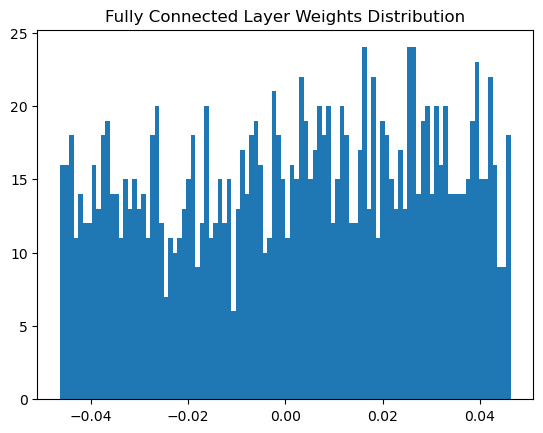

In [10]:
import matplotlib.pyplot as plt

# Assuming your model has a convolutional layer, for example 'conv1.weight'
# For a fully connected layer, for example 'fc.weight'
fc_weights = state_dict['sam.mask_decoder.iou_prediction_head.layers.2.weight'].cpu().numpy()

plt.hist(fc_weights.flatten(), bins=100)
plt.title('Fully Connected Layer Weights Distribution')
plt.show()
